<a href="https://colab.research.google.com/github/KrishChothani/Computer-Vision-Using-Deep-Learning/blob/main/CVDLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Image Dimension :  225 225 3


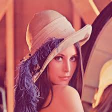

Converted Image dimension : (112, 112, 3)


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

def resize_mat(layer) :
  new_rows = layer.shape[0] // 2
  new_cols = layer.shape[1] // 2

  convertedMat = np.zeros((new_rows, new_cols), dtype=np.uint8)

  for i in range(new_rows):
    for j in range(new_cols):
      row_start = i * 2
      row_end = row_start + 2
      col_start = j * 2
      col_end = col_start + 2

      block = layer[row_start:row_end, col_start:col_end]
      convertedMat[i][j] = np.average(block)

  return convertedMat


image_path = 'Lena.jpg'

row=original_image.shape[0]
col=original_image.shape[1]
depth=original_image.shape[2]
print("Original Image Dimension : ",row,col,depth)
red=original_image[:,:,2]
green=original_image[:,:,1]
blue=original_image[:,:,0]

resized_red = resize_mat(red)
resized_green = resize_mat(green)
resized_blue = resize_mat(blue)

# resized_image = cv2.merge((resized_blue, resized_green, resized_red))
resized_image = np.stack((resized_blue, resized_green, resized_red), axis=-1)

cv2_imshow(resized_image)
print("Converted Image dimension :",resized_image.shape)



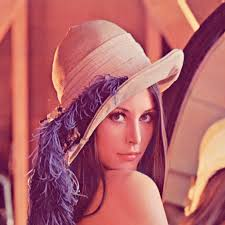

Shape of the original :  (225, 225, 3)
Converted image 


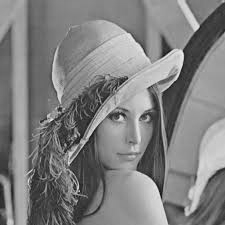

Shape of the converted :  (225, 225)


In [ ]:


def convertTGrayScale(image):
  GI = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
  for i in range(image.shape[0]) :
    for j in range(image.shape[1]) :
      GI[i][j] = np.average(image[i][j][0:3])
  return GI


image_path = 'Lena.jpg'
if os.path.exists(image_path):
    original_image = cv2.imread(image_path)
    cv2_imshow(original_image)
    print("Shape of the original : ",original_image.shape)

    if original_image is not None:
        GI = convertTGrayScale(original_image)
        print("Converted image ")
        cv2_imshow(GI)
        print("Shape of the converted : ",GI.shape)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    else:
        print(f"Failed to read image at {image_path}")

else:
    print(f"File not found: {image_path}")

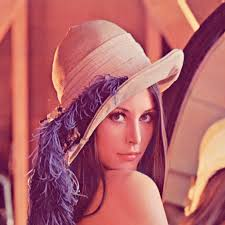

Shape of the original :  (225, 225, 3)
Converted image 


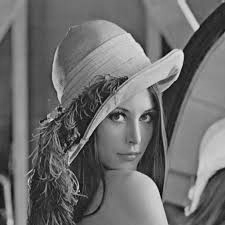

Shape of the converted :  (225, 225)


In [ ]:
def convertTGrayScale(image):
  GI = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
  for i in range(image.shape[0]) :
    for j in range(image.shape[1]) :
      GI[i][j] = 0.299*image[i][j][0] + 0.587*image[i][j][1] + 0.114*image[i][j][2]
  return GI


image_path = 'Lena.jpg'
if os.path.exists(image_path):
    original_image = cv2.imread(image_path)
    cv2_imshow(original_image)
    print("Shape of the original : ",original_image.shape)

    if original_image is not None:
        GI = convertTGrayScale(original_image)
        print("Converted image ")
        cv2_imshow(GI)
        print("Shape of the converted : ",GI.shape)


    else:
        print(f"Failed to read image at {image_path}")

else:
    print(f"File not found: {image_path}")

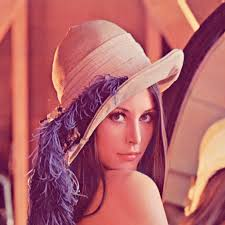

Shape of the original :  (225, 225, 3)


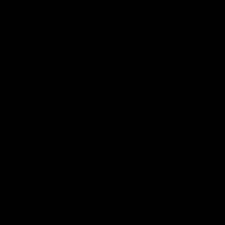

Image 90 flipped


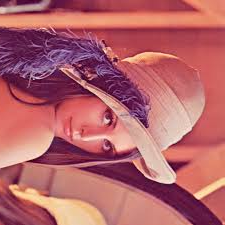

Shape of the converted :  (225, 225, 3)


In [ ]:
def flip90(image):
  depth = image.shape[2]
  I90 = np.zeros((image.shape[1], image.shape[0] , depth), dtype=np.uint8)
  r = image.shape[0]
  c = image.shape[1]
  # cv2_imshow(I90)
  for i in range(r) :
    for j in range(c) :
      I90[j][r - 1 - i] = image[i][j]
  return I90


image_path = 'Lena.jpg'
original_image = cv2.imread(image_path)
cv2_imshow(original_image)
print("Shape of the original : ",original_image.shape)

if original_image is not None:
    I90 = flip90(original_image)
    print("Image 90 flipped")
    cv2_imshow(I90)
    print("Shape of the converted : ",I90.shape)


else:
    print(f"Failed to read image at {image_path}")

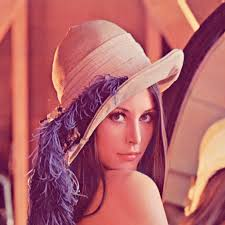

Shape of the original :  (225, 225, 3)
Image 180 flipped


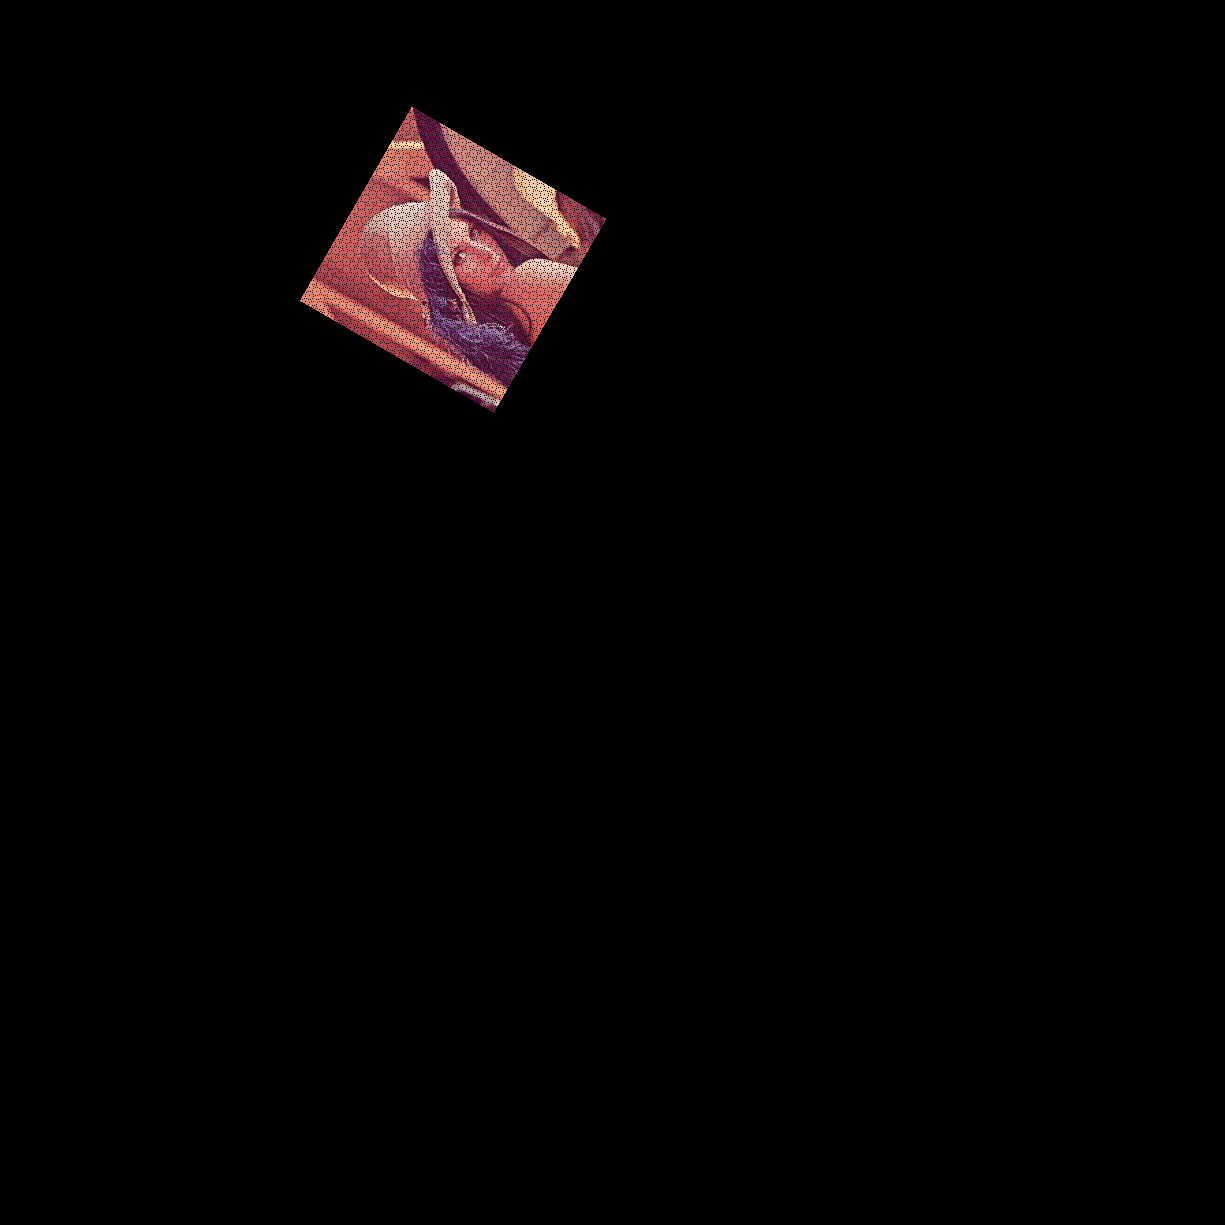

Shape of the converted :  (1225, 1225, 3)


In [ ]:
#clockwise
import cv2
import os
from google.colab.patches import cv2_imshow
import math
import numpy as np

def flip60(image):
    depth = image.shape[2]
    I60 = np.zeros((image.shape[0] + 1000, image.shape[1] + 1000, depth), dtype=np.uint8)
    r = image.shape[0]
    c = image.shape[1]

    angle_rad = math.radians(60)  # convert degrees to radians
    cos_val = math.cos(angle_rad)
    sin_val = math.sin(angle_rad)

    for i in range(r):
        for j in range(c):
            x = int(i * cos_val - j * sin_val)
            y = int(i * sin_val + j * cos_val)

            # shifting so coords stay positive
            I60[x + 300, y + 300] = image[i, j]

    return I60


image_path = 'Lena.jpg'
if os.path.exists(image_path):
    original_image = cv2.imread(image_path)
    cv2_imshow(original_image)
    print("Shape of the original : ",original_image.shape)

    if original_image is not None:
        I60 = flip60(original_image)
        print("Image 180 flipped")
        cv2_imshow(I60)
        print("Shape of the converted : ",I60.shape)


    else:
        print(f"Failed to read image at {image_path}")

else:
    print(f"File not found: {image_path}")

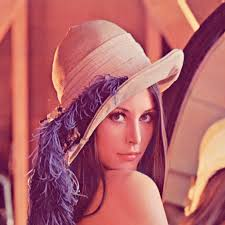

Shape of the original :  (225, 225, 3)
Image translated


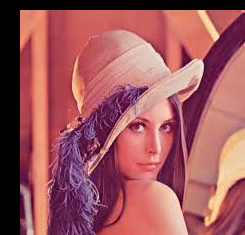

Shape of the translated :  (235, 245, 3)


In [ ]:


import cv2
import os
from google.colab.patches import cv2_imshow
import math
import numpy as np

def translate(image,tx,ty):
    r = image.shape[0]
    c = image.shape[1]
    rotated = np.zeros((r+tx,c+ty,3), dtype=np.uint8)
    for i in range(r) :
      for j in range(c) :
        rotated[i+tx][j+ty] = image[i][j]

    return rotated

image_path = 'Lena.jpg'
if os.path.exists(image_path):
    original_image = cv2.imread(image_path)
    cv2_imshow(original_image)
    print("Shape of the original : ", original_image.shape)

    if original_image is not None:
        translatedImage  = translate(original_image, 10,20)
        print("Image translated")
        cv2_imshow(translatedImage)
        print("Shape of the translated : ", translatedImage.shape)

    else:
        print(f"Failed to read image at {image_path}")
else:
    print(f"File not found: {image_path}")



Original size: (256, 384, 3)


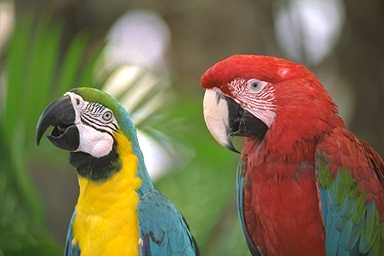

New size: (128, 192, 3)


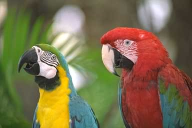

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_path = 'Parrot.jpg'

img = cv2.imread(image_path)

if img is not None:
    print("Original size:", img.shape)
    cv2_imshow(img)

    scale = 0.5
    height, width = img.shape[:2]
    new_size = (int(width * scale), int(height * scale))

    bigger_img = cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR)

    print("New size:", bigger_img.shape)
    cv2_imshow(bigger_img)

else:
    print("Image not found.")


(256, 384, 3)


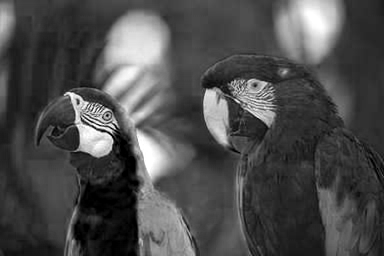

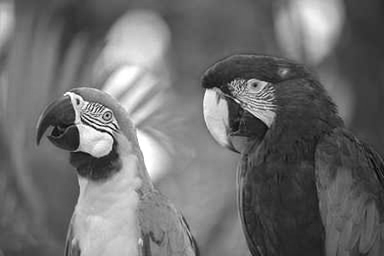

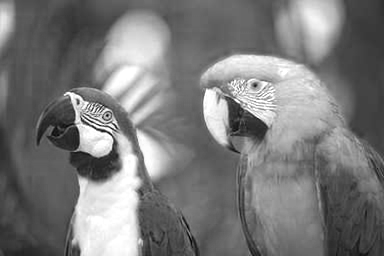

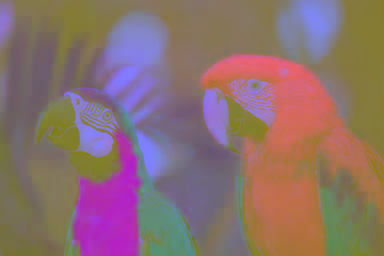

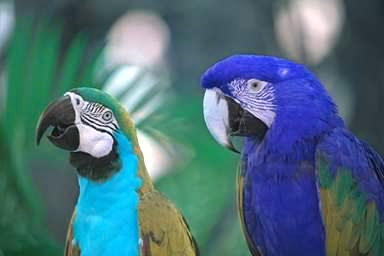

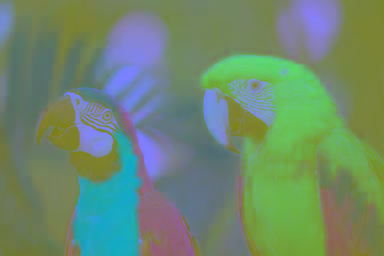

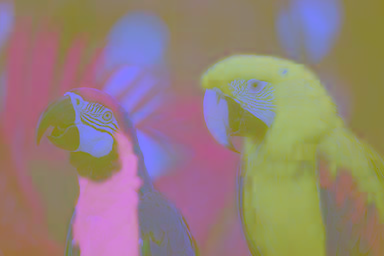

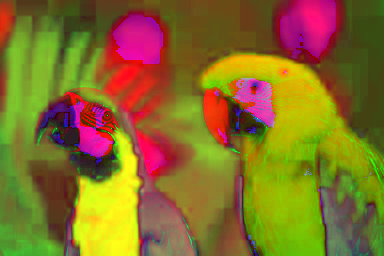

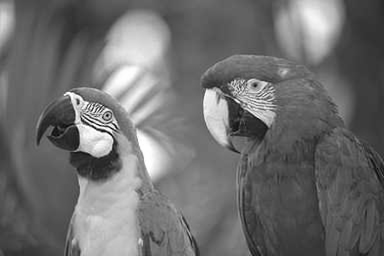

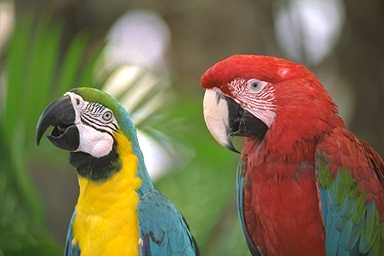

In [ ]:
## COLOR CHANGING ##
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

image_path = 'Parrot.jpg'

if os.path.exists(image_path):
    image = cv2.imread(image_path)
    print(image.shape)

    if image is not None:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        b,g,r = cv2.split(image)
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)


        cv2_imshow(b)
        cv2_imshow(g)
        cv2_imshow(r)

        cv2_imshow(yuv)
        cv2_imshow(rgb)
        cv2_imshow(ycrcb)
        cv2_imshow(lab)

        cv2_imshow(hsv)
        cv2_imshow(gray)
        cv2_imshow(image)

    else:
        print(f"Failed to read image at {image_path}")

else:
    print(f"File not found: {image_path}")

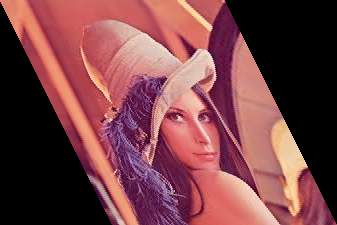

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('Lena.jpg')
rows, cols, _ = img.shape

shear_factor = 0.5

new_cols = int(cols + shear_factor * rows)
shear_manual = np.zeros((rows, new_cols, 3), dtype=np.uint8)

for x in range(rows):
    for y in range(cols):
        new_y = int(y + shear_factor * x)
        if new_y < new_cols:
            shear_manual[x, new_y] = img[x, y]

cv2_imshow(shear_manual)
